In [2]:
%pip install pandas 
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
df = heart_disease.data.features 
df_results = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

1. Clean your dataset to turn categorical values into numerical ones. One-hot encoding is likely the answer, but it depends on the dataset. Your data may have ordinal columns, for example where one-hot encoding is not as appropriate. 

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object

This step was already done, from the metadata we can see that thal,slope,exang,restecg,fbs,cp, & sex  are all categorical but have been turned into discrete int or float as preprocessing.

I can deal with null values for the non categorical columns though

{'whiskers': [<matplotlib.lines.Line2D at 0x25ce4d25d00>,
 'caps': [<matplotlib.lines.Line2D at 0x25ce4d44280>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ce4d25a60>],
 'medians': [<matplotlib.lines.Line2D at 0x25ce4d447c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ce4d44a60>],
 'means': []}

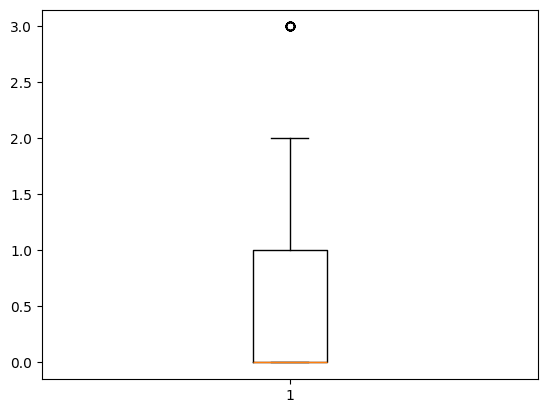

In [15]:
plt.boxplot(df['ca'].dropna())

Large skew so we use mean

In [19]:
df['ca'] = df['ca'].fillna(df['ca'].dropna().mean())

C:\Users\Admin\AppData\Local\Temp\ipykernel_73312\2316857977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ca'] = df['ca'].fillna(df['ca'].dropna().mean())


2. Perform univariate linear regression on the dataset. Select your variable to predict. How well did this model perform? Is this a good approach for this dataset? Why or why not? 

The only other column missing values is 'thal' which is a categorical one. We can either drop the null values, or replace them with mode(thins wouldn't be the best, but is the best I can think of without a clustering ML algorithm)

In [23]:
print(df[df['thal'] == np.null])

AttributeError: module 'numpy' has no attribute 'null'